# Predicting Calories Burned Based on Exercise and Biological Data

In this project, we aim to predict the number of calories burned during a workout based on biological measures such as gender, age, height, weight, duration of exercise, heart rate, and body temperature. We will use machine learning techniques to create a predictive model and evaluate its performance.

# Objectives
- Merge two datasets containing user exercise data and calories burned.
- Preprocess the data for machine learning.
- Visualize the relationships between variables.
- Build models to predict calories burned.
- Evaluate model performance to find the best model.


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Loading the Data

In [2]:
exercise_df = pd.read_csv('exercise.csv')
calories_df = pd.read_csv('calories.csv')

# Display first few rows of both datasets
print("Exercise Data:")
print(exercise_df.head())

print("\nCalories Data:")
print(calories_df.head())

Exercise Data:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

Calories Data:
    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


In [3]:
# Mergge the datasets on User_ID
merged_df = exercise_df.merge(calories_df, on='User_ID')

# Display the first few rows of the merged dataset
merged_df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# Data Exploration

In [4]:
# Check for missing values
print("Missing values in each column:")
print(merged_df.isnull().sum())

Missing values in each column:
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
merged_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


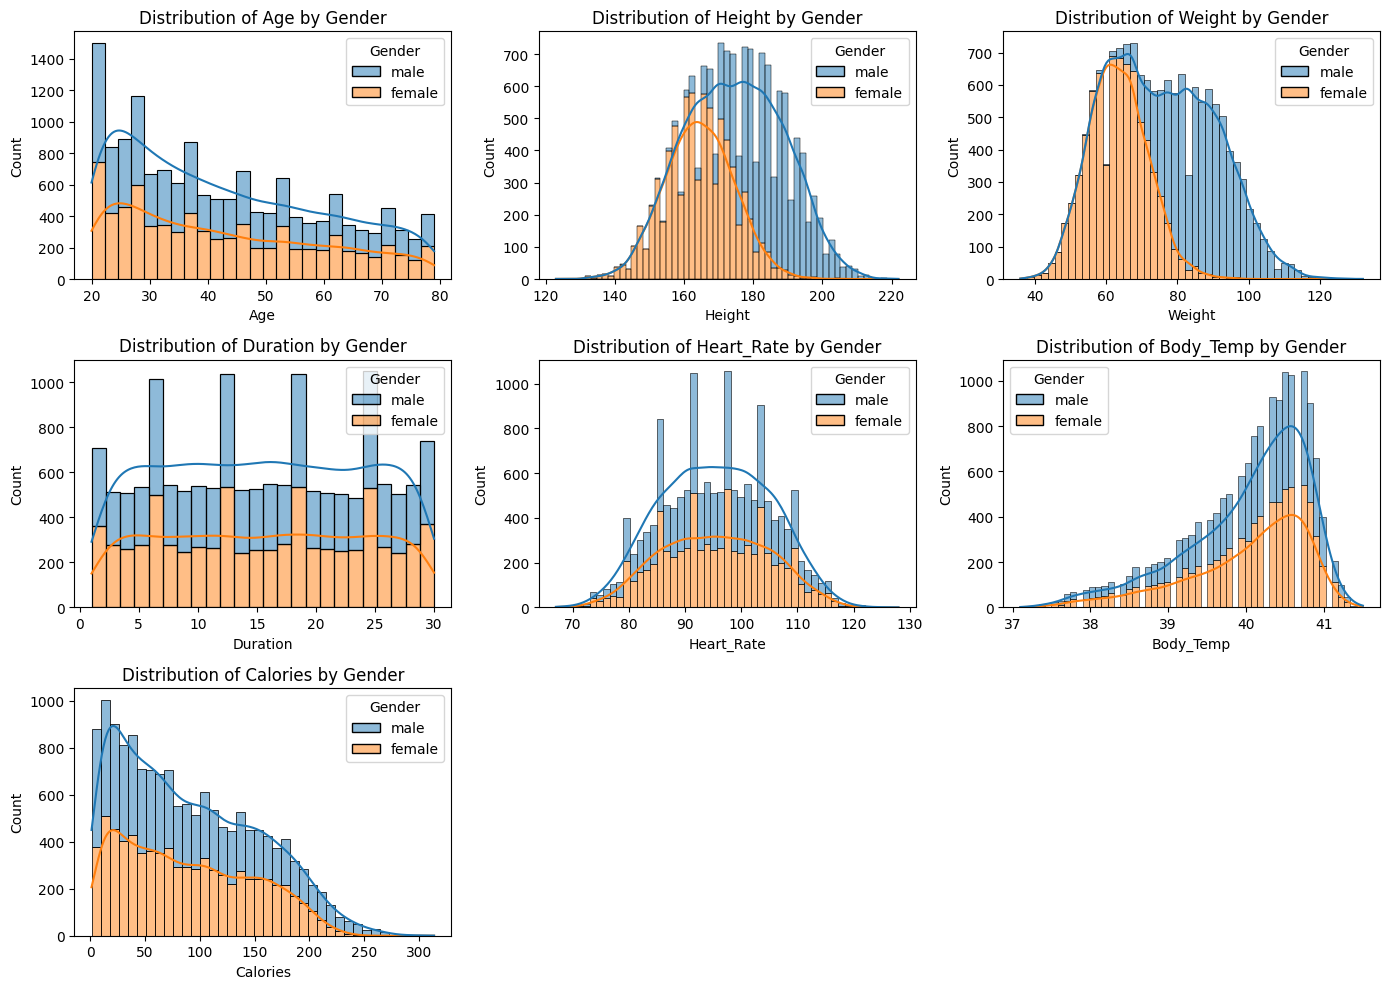

In [7]:
# Plot the distribution of continuous features with gender color-coding
features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=merged_df, x=feature, hue='Gender', kde=True, multiple='stack')
    plt.title(f'Distribution of {feature} by Gender')
plt.tight_layout()
plt.show()

## Observation:

- The distribution of some continous variables like height, weight, duration, and heart rate follows a somewhat normal distribution. Others, like age and body temperature are skewed left.
- Males tend to have higher Weight, Height, and Heart_Rate values compared to females, while females generally show a wider range in Duration and Calories. This reveal that there are noticeable differences in workout behavior and biological measures between genders.

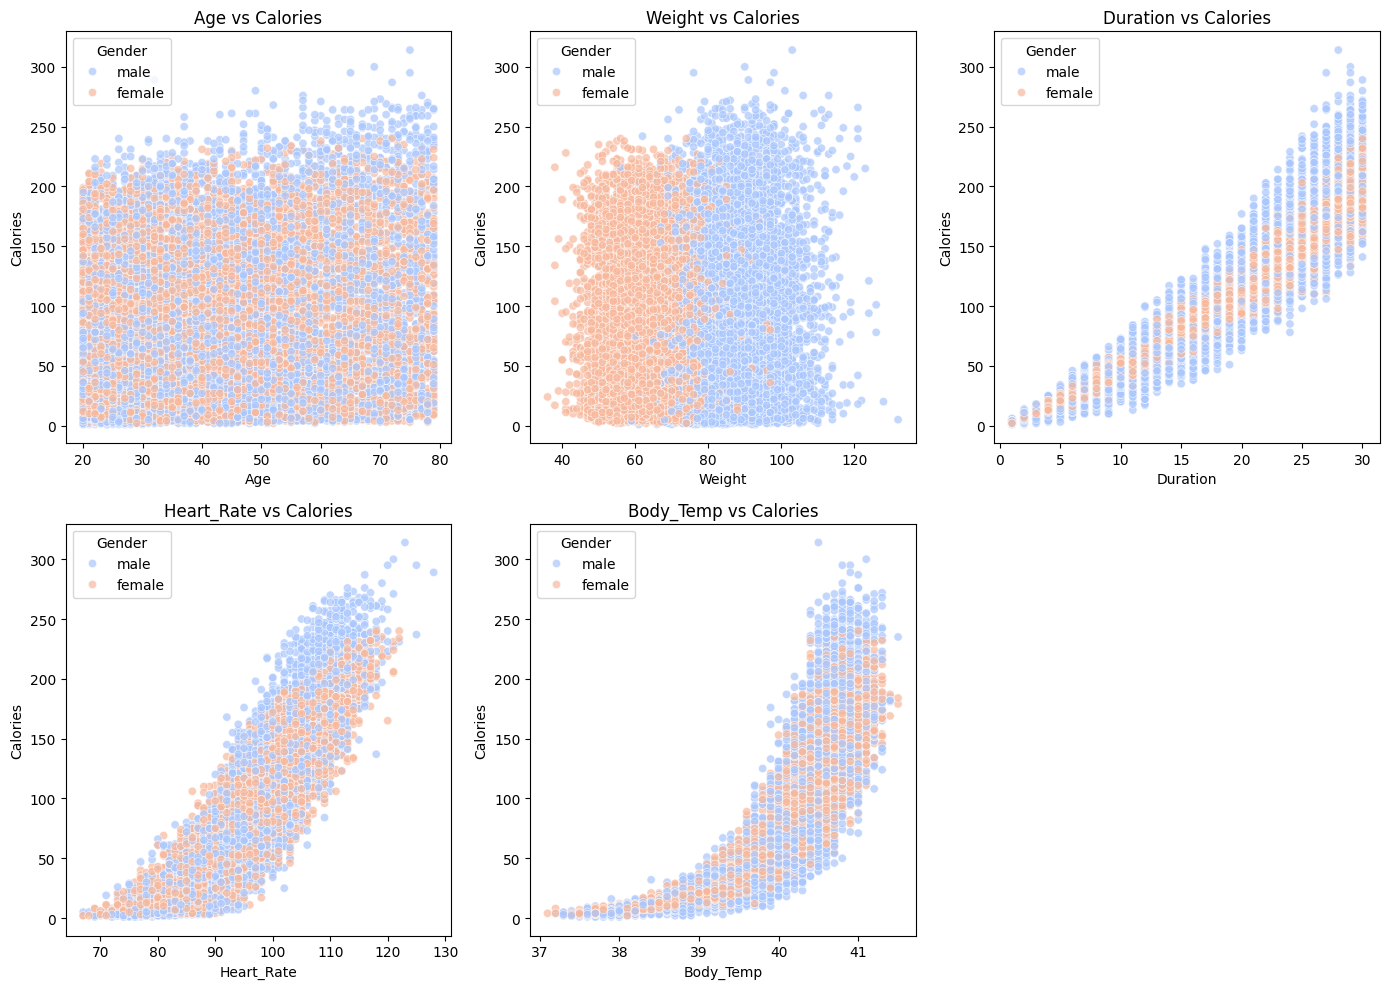

In [8]:
# List of features to compare against calories
scatter_features = ['Age', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(scatter_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=merged_df, x=feature, y='Calories', hue='Gender', palette='coolwarm', alpha=0.7)
    plt.title(f'{feature} vs Calories')
    plt.xlabel(feature)
    plt.ylabel('Calories')

plt.tight_layout()
plt.show()

## Observation:

- **Age vs. Calories:** There is not a clear trend between age and it's effect on calories burned. Further data analysis is needed. 
- **Duration vs. Calories:** The longer the duration of the exercise, the higher the calories burned, with males burning both more and fewer calories per unit of time compared to females.
- **Heart_Rate vs. Calories:** There is a positive relationship between heart rate and calories burned, with males tending to have higher heart rates during exercise.
- **Weight vs. Calories:** Higher weight tends to be associated with more calories burned, especially in males.
- **Body_Temp vs. Calories:** There is a positive exponential relationship between Body_Temp and calories burned with not a clear trend showing effects of gender differences

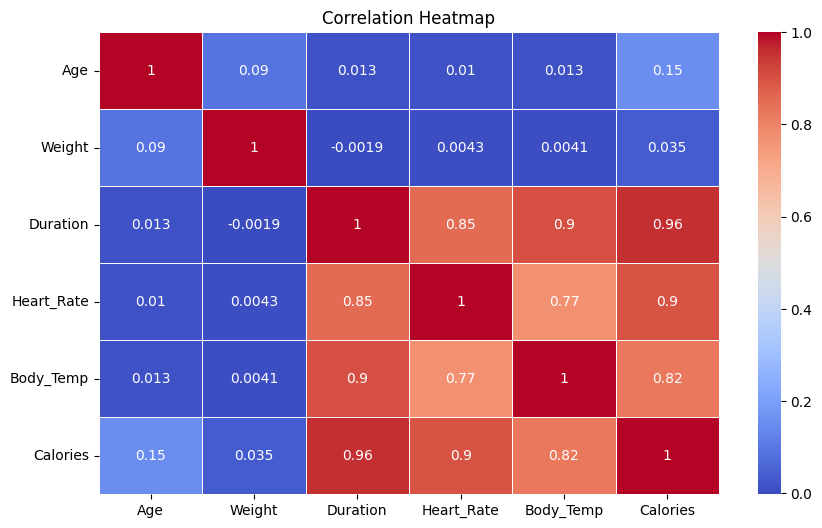

In [20]:
# Correlation matrix
matrix_feature=['Age', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df[matrix_feature].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Observation:
- Calories has a strong positive correlation with Duration (0.96), Heart_Rate (0.9), and Body_Temp (0.82). This suggests that the longer the workout and the higher the heart rate and body temperature, the more calories are burned.
- Other variables like Weight and Age show a moderate correlations with calories.

## Data Preprocessing

In [19]:
# Encode categorical data into continuous data
gender_var = {'Gender': {'male':0, 'female': 1}}
merged_df = merged_df.replace(gender_var)

In [11]:
# Features and labels
X = merged_df.drop(['User_ID', 'Calories'], axis=1)
y = merged_df['Calories']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Building

## Linear regression

In [13]:
# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on test data
y_pred_lr = linear_reg.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R²: {r2_lr}')

Linear Regression MSE: 131.995745750817
Linear Regression R²: 0.9672937151257295


## Random Forest Regression

In [14]:

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R²: {r2_rf}')

Random Forest MSE: 7.109940933333334
Random Forest R²: 0.9982382784211559


## XGBoost Regression

In [15]:

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R²: {r2_xgb}')

XGBoost MSE: 4.568956111227719
XGBoost R²: 0.9988678909361673


## Ridge and Lasso Regression

In [16]:

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression R²: {r2_ridge}')

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Regression R²: {r2_lasso}')

Ridge Regression MSE: 132.00196654599816
Ridge Regression R²: 0.967292173719238
Lasso Regression MSE: 133.08212340160495
Lasso Regression R²: 0.9670245293521608


# Comparing Model Performance

               Model         MSE        R²
0  Linear Regression  131.995746  0.967294
1      Random Forest    7.109941  0.998238
2            XGBoost    4.568956  0.998868
3   Ridge Regression  132.001967  0.967292
4   Lasso Regression  133.082123  0.967025


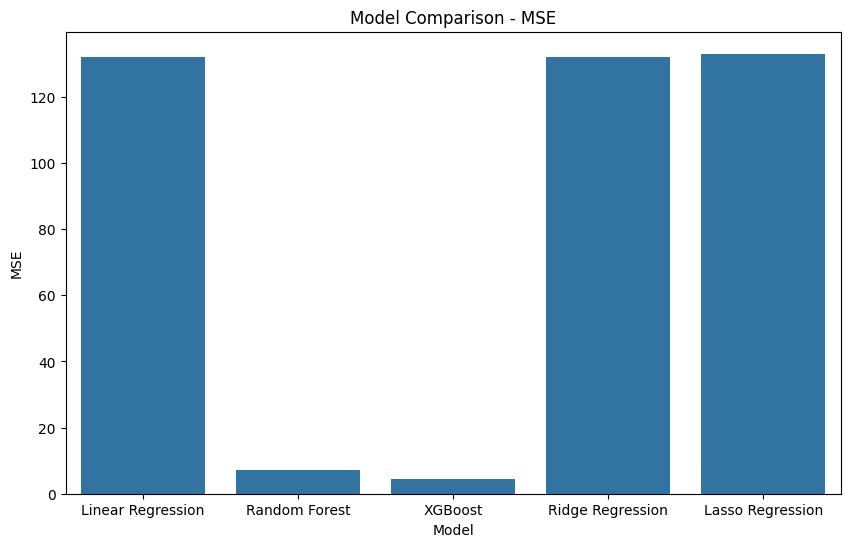

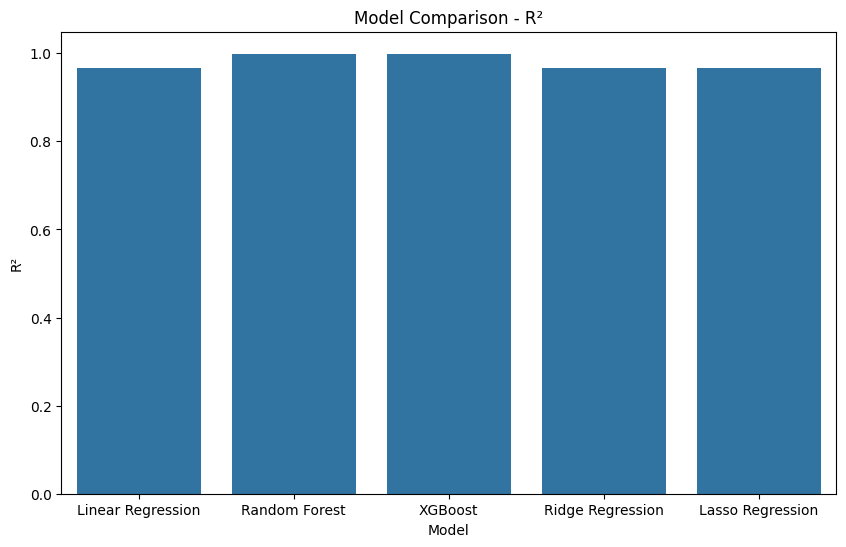

In [17]:
# Model performance comparison
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'Ridge Regression', 'Lasso Regression']
mse_values = [mse_lr, mse_rf, mse_xgb, mse_ridge, mse_lasso]
r2_values = [r2_lr, r2_rf, r2_xgb, r2_ridge, r2_lasso]

performance_df = pd.DataFrame({'Model': models, 'MSE': mse_values, 'R²': r2_values})
print(performance_df)

# Visualize the performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=performance_df)
plt.title('Model Comparison - MSE')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', data=performance_df)
plt.title('Model Comparison - R²')
plt.show()

## Observation

**Random Forest** and **XGBoost** tend to outperform the other models in terms of both MSE and R². The Random Forest model returns an MSE score of 7.109941 and R^2 of 0.998238. The XGBoost model returns an MSE score of 4.568956 and R^2 of 0.998868. These suggest that they can capture the non-linear relationships in the data better. <br>

**Lasso Regression** performs the worst with an MSE score of 133.082123 and R^2 of 0.967025, likely because it overly penalizes less significant features.


# Conclusion
In this project, we developed predictive models to estimate the number of calories burned during a workout based on various biological measures such as gender, age, weight, height, duration, heart rate, and body temperature. We began by merging two datasets containing exercise and calorie data, followed by a thorough exploratory data analysis (EDA) to visualize relationships between variables and machine learning. <br>

Multiple models were applied, including Linear Regression, Random Forest, XGBoost, Ridge, and Lasso Regression.
Random Forest and XGBoost provided the best performance in terms of Mean Squared Error (MSE) and R² scores, capturing the non-linear relationships in the data more effectively than simpler models like Linear Regression or regularized models like Ridge and Lasso.

## Future thoughts

In the future, this project could be improved by incorporating more advanced features, such as interaction terms between variables (e.g., heart rate and duration), and additional data like workout intensity or VO2 max for enhanced predictions. Expanding the dataset with more diverse demographics and larger samples would make the model more generalizable. Advanced machine learning models, such as neural networks, and ensemble methods like stacking, could be explored for better predictive accuracy. Hyperparameter tuning and cross-validation would further optimize model performance, while integrating real-time data from wearable devices could lead to real-time calorie prediction and tracking applications.

**Thank you for reading!**